# Estimation of model patrameters of an AR(3) simulation

$$ x_t = \phi_1 \times x_{t-1} + \phi_2 \times x_{t-2} + \phi_3 \times x_{t-3} + z_t $$

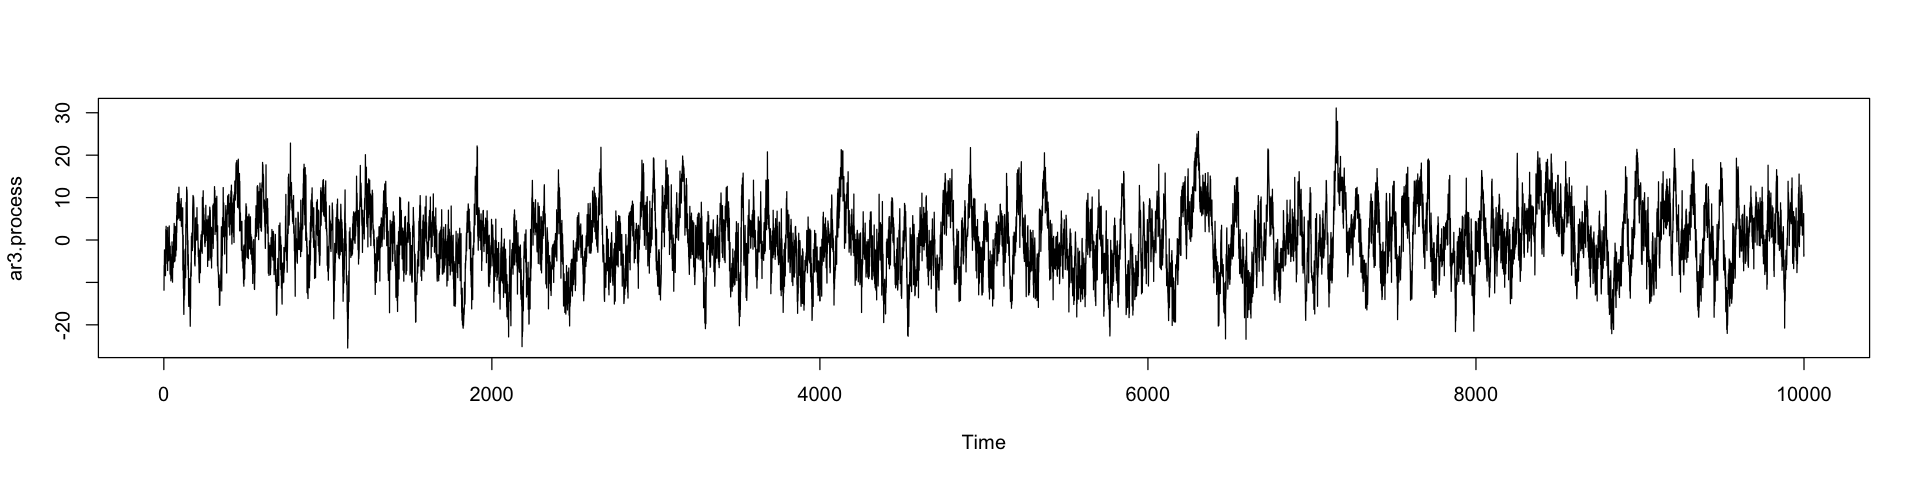

In [4]:
#simulate AR(3) process
set.seed(2017)
sigma = 4
phi=NULL
phi[1:3]=c(1/3, 1/2, 7/100)
n = 10000
ar3.process = arima.sim(n, model=(ar=list(ar=phi)), sd=sigma)
options(repr.plot.width=16, repr.plot.height=4)
plot(ar3.process)

In [5]:
# compute coefficient of phi
# Rx = b
# Yule Walker 
r = NULL
r[1:3] = acf(ar3.process, plot=F)$acf[2:4]
R = matrix(1, 3, 3)
R[1,2]=r[1] 
R[1,3]=r[2]
R[2,1]=r[1]
R[2,3]=r[1]
R[3,1]=r[2]
R[3,2]=r[1]
b=matrix(,3,1)# b- column vector with no entries
b[1,1]=r[1]
b[2,1]=r[2]
b[3,1]=r[3]
phi.hat = solve(R, b)
phi.hat

0.3512298
0.4890902
0.0637896


计算得$\phi$系数, 预设值为 1/3, 1/2, 7/100

In [7]:
# sigma estimation
c0 = acf(ar3.process, type='covariance', plot=F)$acf[1]
var.hat = c0*(1-sum(phi.hat*r))
var.hat

[1] 16.38984

variance 接近预设值simga=4的平方

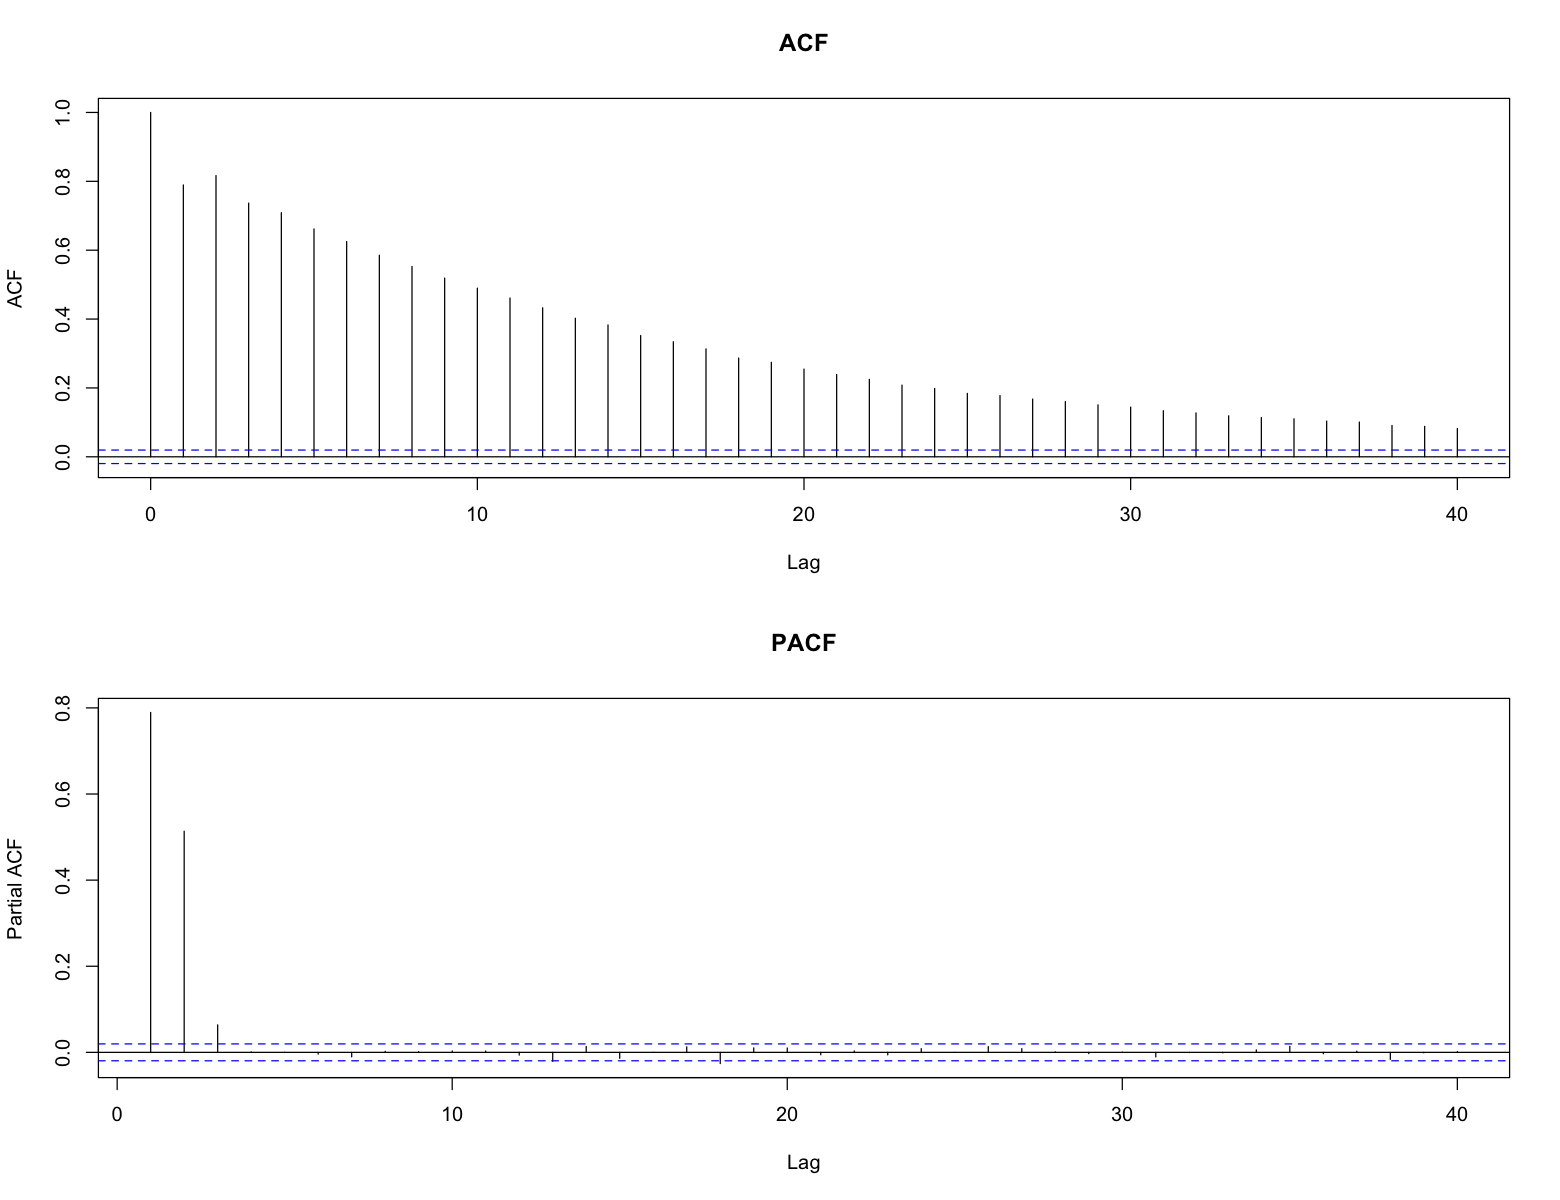

In [10]:
par(mfrow=c(2,1))
options(repr.plot.width=13, repr.plot.height=10)
acf(ar3.process, main='ACF')
pacf(ar3.process, main='PACF')